## Deadzone quantization in VCF

In [1]:
from IPython.display import Image, display

In [2]:
#!pip install -r ../requirements.txt

### Encoding help

In [3]:
!python ../src/deadzone.py encode -h

usage: deadzone.py encode [-h] [-e ENTROPY_IMAGE_CODEC]

options:
  -h, --help            show this help message and exit
  -e ENTROPY_IMAGE_CODEC, --entropy_image_codec ENTROPY_IMAGE_CODEC
                        Entropy Image Codec (default: TIFF)


### Encoding

In [4]:
!wget http://www.hpca.ual.es/~vruiz/images/Homer.png -O /tmp/Homer.png

--2025-03-09 19:36:26--  http://www.hpca.ual.es/~vruiz/images/Homer.png
Resolving www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Connecting to www.hpca.ual.es (www.hpca.ual.es)|150.214.150.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374512 (366K) [image/png]
Saving to: ‘/tmp/Homer.png’

/tmp/Homer.png      100%[===================>] 365.73K  1.02MB/s    in 0.3s    

2025-03-09 19:36:27 (1.02 MB/s) - ‘/tmp/Homer.png’ saved [374512/374512]



In [6]:
!python ../src/deadzone.py -g encode -i /tmp/Homer.png

main Namespace(debug=True, subparser_name='encode', entropy_image_codec='TIFF', input='/tmp/Homer.png', output='/tmp/encoded', QSS=32, func=<function encode at 0x7f539efa2980>)
(INFO) main main 18: input = /tmp/Homer.png
(INFO) main main 19: output = /tmp/encoded
(DEBUG) entropy_image_coding __init__ 23: args = Namespace(debug=True, subparser_name='encode', entropy_image_codec='TIFF', input='/tmp/Homer.png', output='/tmp/encoded', QSS=32, func=<function encode at 0x7f539efa2980>)
(DEBUG) entropy_image_coding __init__ 28: self.encoding = True
(DEBUG) blur __init__ 37: args = Namespace(debug=True, subparser_name='encode', entropy_image_codec='TIFF', input='/tmp/Homer.png', output='/tmp/encoded', QSS=32, func=<function encode at 0x7f539efa2980>)
(DEBUG) deadzone __init__ 41: args = Namespace(debug=True, subparser_name='encode', entropy_image_codec='TIFF', input='/tmp/Homer.png', output='/tmp/encoded', QSS=32, func=<function encode at 0x7f539efa2980>)
(INFO) entropy_image_coding encode_rea

### Decoding

In [7]:
!python ../src/deadzone.py -g decode

main Namespace(debug=True, subparser_name='decode', entropy_image_codec='TIFF', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', QSS=32, func=<function decode at 0x7f4928dce020>)
(INFO) main main 18: input = /tmp/encoded
(INFO) main main 19: output = /tmp/decoded.png
(DEBUG) entropy_image_coding __init__ 23: args = Namespace(debug=True, subparser_name='decode', entropy_image_codec='TIFF', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', QSS=32, func=<function decode at 0x7f4928dce020>)
(DEBUG) entropy_image_coding __init__ 28: self.encoding = False
(DEBUG) blur __init__ 37: args = Namespace(debug=True, subparser_name='decode', entropy_image_codec='TIFF', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', QSS=32, func=<function decode at 0x7f4928dce020>)
(DEBUG) deadzone __init__ 41: args = Namespace(debug=True, subparser_name='decode', entropy_image_codec='TIFF', filter='none', filter_size=3, input=

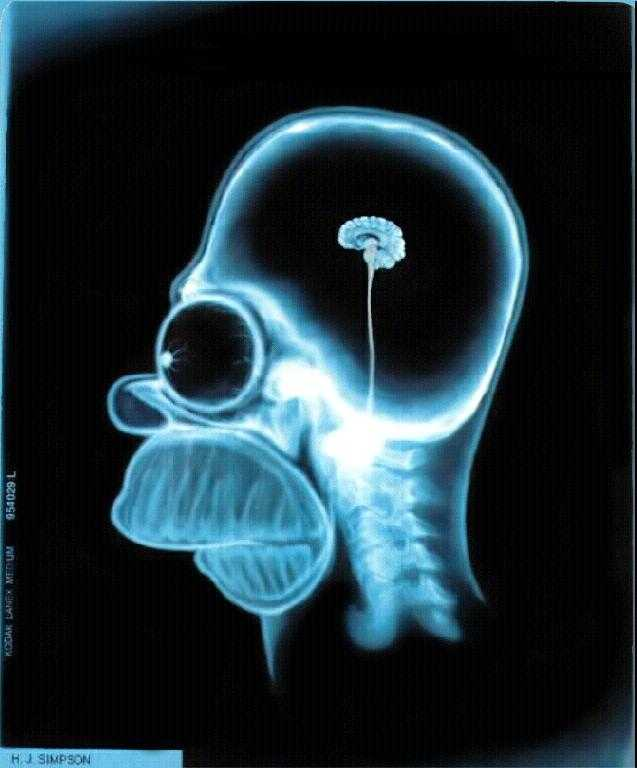

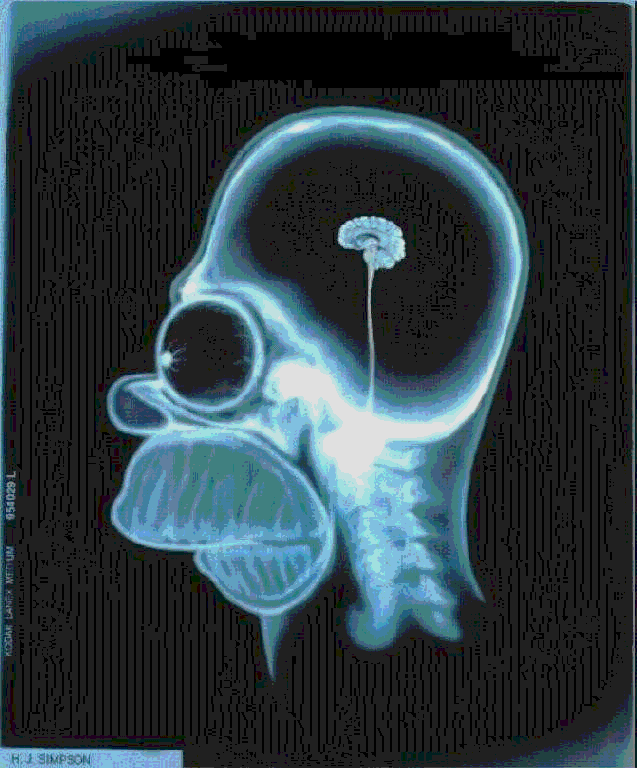

In [8]:
display(Image(filename="/tmp/original.png"))
display(Image(filename="/tmp/decoded.png"))

### Decreasing QSS

In [ ]:
!python ../src/deadzone.py encode -i /tmp/Homer.png -q 1
!python ../src/deadzone.py decode -q 1
display(Image(filename="/tmp/decoded.png"))

### Increasing QSS

In [ ]:
!python ../src/deadzone.py encode -i /tmp/Homer.png -q 64
!python ../src/deadzone.py decode -q 64
display(Image(filename="/tmp/decoded.png"))

### Using PNM

In [ ]:
!python ../src/deadzone.py encode -i /tmp/Homer.png -q 64 -e PNM
!python ../src/deadzone.py decode -q 64 -e PNM
display(Image(filename="/tmp/decoded.png"))

### Using PNG
Which is the default entropy encoder.

In [ ]:
!python ../src/deadzone.py encode -i /tmp/Homer.png -q 64 -e PNG
!python ../src/deadzone.py decode -q 64 -e PNG
display(Image(filename="/tmp/decoded.png"))

### Using Huffman

In [ ]:
!python ../src/deadzone.py encode -i /tmp/Homer.png -q 64 -e Huffman
!python ../src/deadzone.py decode -q 64 -e Huffman
display(Image(filename="/tmp/decoded.png"))

### Using zlib

In [ ]:
!python ../src/deadzone.py encode -i /tmp/Homer.png -q 64 -e z_lib
!python ../src/deadzone.py decode -q 64 -e z_lib
display(Image(filename="/tmp/decoded.png"))

### Using a blur filter

In [ ]:
!python ../src/deadzone.py encode -i /tmp/Homer.png -q 64
!python ../src/deadzone.py decode -q 64 -f gaussian -s 11

In [ ]:
display(Image(filename="/tmp/decoded.png"))